<a href="https://colab.research.google.com/github/na0260/data-minig-lab/blob/main/201002398LabFinalDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [255]:
import pandas as pd
import numpy as np

In [256]:
data = pd.read_csv('/content/heart.csv')

In [257]:
data = data.dropna()
print(data.select_dtypes(include=['object']).columns)

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [258]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['ChestPainType'] = le.fit_transform(data['ChestPainType'])
data['RestingECG'] = le.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = le.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = le.fit_transform(data['ST_Slope'])

In [259]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [260]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [261]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [262]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

print("accuracy: ",accuracy_dt)
print("precision: ",precision_dt)
print("f1 score: ",f1_dt)

accuracy:  0.7536231884057971
precision:  0.8428571428571429
f1 score:  0.7763157894736842


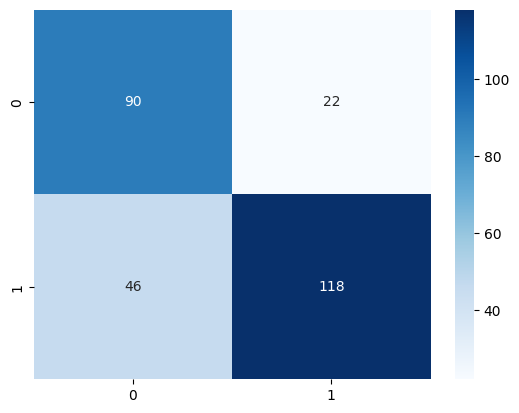

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.show()

In [264]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [265]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

print("accuracy: ",accuracy_lr)
print("precision: ",precision_lr)
print("f1 score: ",f1_lr)

accuracy:  0.8695652173913043
precision:  0.9210526315789473
f1 score:  0.8860759493670887


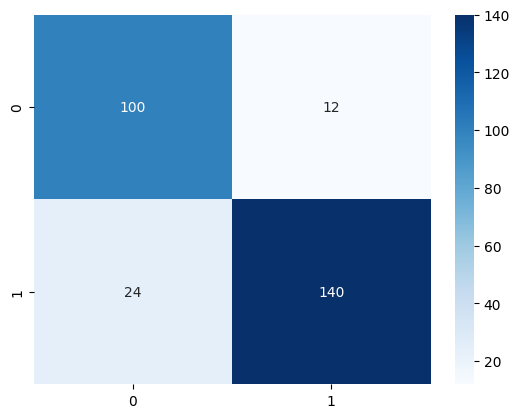

In [266]:
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.show()